Importing everything

In [56]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.losses import categorical_crossentropy
from matplotlib import pyplot as plt
import numpy as np
tf.keras.utils.set_random_seed(
    seed = 1)

Instantiate Image Generator and Training,Validation Iterators

In [57]:
data_generator = ImageDataGenerator(rescale=1.0/255, zoom_range=0.1, rotation_range=27, width_shift_range=0.05, height_shift_range=0.05)
training_iterator = data_generator.flow_from_directory('train',color_mode='grayscale',seed=1, class_mode='categorical')
validation_iterator = data_generator.flow_from_directory('test',color_mode='grayscale',seed=1, class_mode='categorical')

Found 540 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


The function that Creates the Sequential Model

In [58]:
def create_model():
    model = Sequential()
    model.add(layers.Input(shape=training_iterator.image_shape))
    model.add(layers.Conv2D(5, 5, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.MaxPooling2D(pool_size=(5,5), strides=5))
    model.add(layers.Dropout(0.2))

    model.add(layers.MaxPooling2D(pool_size=(5,5), strides=3))
    model.add(layers.Flatten())
    model.add(layers.Dense(3,activation='softmax'))
    return model

In [72]:
def test_model(model,validation_iterator):
        test_features,test_labels = validation_iterator.next()
        random_indicies = np.random.choice(len(test_features),10)
        test_features = test_features[random_indicies]
        test_labels = test_labels[random_indicies]
        class_names = {0:'Covid',
                      1:"Normal",
                      2:'Pneumonia'}
        test_prediction = model.predict(test_features)
        
        for i,(image, prediction, label) in enumerate(zip(test_features, test_prediction, test_labels)):

            image_name = "X_ray {}".format(i)

            #Gets predicted class according to the highest probability
            predicted_class = np.argmax(prediction)
            #Gets correct label
            actual_class = np.argmax(label)
            

            print(image_name)
            print("\tModel prediction: {}".format(prediction))
            print("\tTrue label: {} ({})".format(class_names[actual_class], actual_class))
            print("\tCorrect:", predicted_class == actual_class)
            #Saves image file using matplotlib
            sample_image = image
            blank_axes(plt.imshow(
                sample_image[:, :, 0],
                cmap = "gray"
            ))
            plt.title(" Predicted: {}, Actual: {}".format(class_names[predicted_class], class_names[actual_class]))
            plt.tight_layout()
            plt.show()

            plt.clf()
          
        print(model.evaluate(test_features,test_labels))

In [60]:
def blank_axes(plot):
        plot.axes.get_xaxis().set_visible(False)
        plot.axes.get_yaxis().set_visible(False)

In [61]:
#Model Creation and Compiling
model = create_model()
model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.Adam(learning_rate = 0.005), metrics=['acc'])
print(model.summary())
#es = EarlyStopping(monitor='val_loss', patience=6)
history = model.fit(training_iterator, epochs=12,batch_size = 20,validation_data=validation_iterator)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 252, 252, 5)       130       
                                                                 
 dropout_12 (Dropout)        (None, 252, 252, 5)       0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 5)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 50, 50, 5)         0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 5)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1280)             

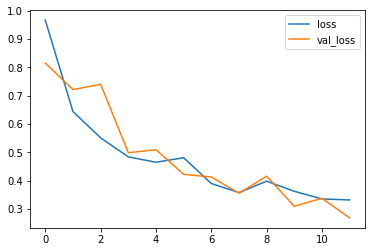

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

X_ray 0
	Model prediction: [0.00424339 0.9093259  0.08643069]
	True label: Normal (1)
	Correct: True


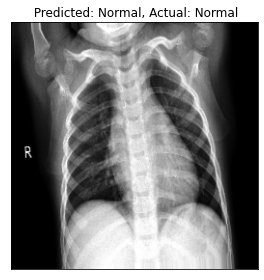

X_ray 1
	Model prediction: [0.00424339 0.9093259  0.08643069]
	True label: Normal (1)
	Correct: True


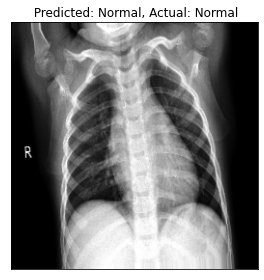

X_ray 2
	Model prediction: [0.9925613  0.00301859 0.00442   ]
	True label: Covid (0)
	Correct: True


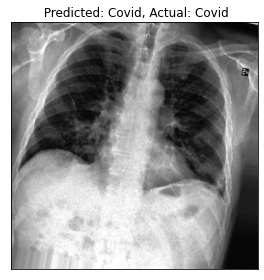

X_ray 3
	Model prediction: [0.8562566  0.05507851 0.0886649 ]
	True label: Covid (0)
	Correct: True


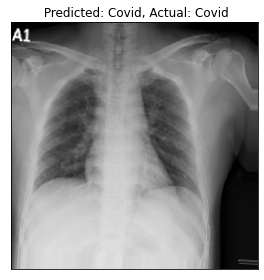

X_ray 4
	Model prediction: [0.8562566  0.05507851 0.0886649 ]
	True label: Covid (0)
	Correct: True


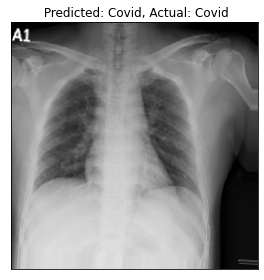

X_ray 5
	Model prediction: [0.99387896 0.00400631 0.00211476]
	True label: Covid (0)
	Correct: True


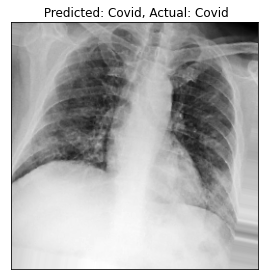

X_ray 6
	Model prediction: [0.97808516 0.00817539 0.01373941]
	True label: Covid (0)
	Correct: True


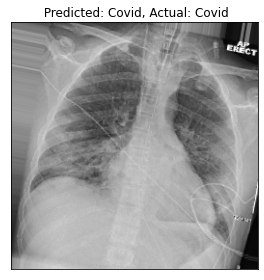

X_ray 7
	Model prediction: [0.97808516 0.00817539 0.01373941]
	True label: Covid (0)
	Correct: True


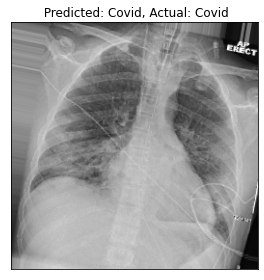

X_ray 8
	Model prediction: [9.9775559e-01 6.2598713e-04 1.6184493e-03]
	True label: Covid (0)
	Correct: True


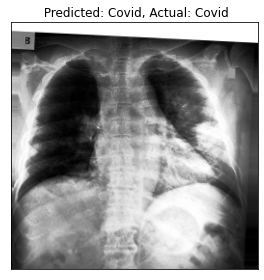

X_ray 9
	Model prediction: [0.38681528 0.5452915  0.06789319]
	True label: Covid (0)
	Correct: False


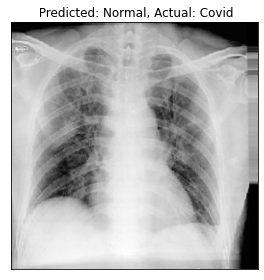

1/1 [==============================] - 0s 55ms/step - loss: 0.1510 - acc: 0.9000
[0.15104520320892334, 0.8999999761581421]


<Figure size 432x288 with 0 Axes>

In [73]:
test_model(model,validation_iterator)